In [1]:
# standard python imports
import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
from tidy3d import web
from tidy3d.constants import C_0, HBAR


In [2]:
# Drude parameters for gold
eps_inf = 9.84 # relative permittivity at infinite frequency
wp = 9.01 #eV, plasma frequency
gamma = 0.072 #eV, damping rate

# Unit conversion from ev to Hz
wp_hz = wp / HBAR / 2 / np.pi
gamma_hz = gamma / HBAR / 2 / np.pi

# Tidy3d Drude model
mat_gold = td.Drude(eps_inf = eps_inf, coeffs = [(wp_hz,gamma_hz)], name='gold Drude')

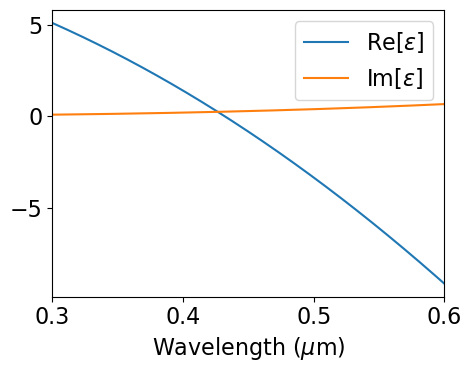

In [3]:
# Compute permittivity in a range of wavelengths
lambda_list = np.linspace(0.3,0.6,500) # um
freq_list = C_0/lambda_list
ep = mat_gold.eps_model(freq_list)

# Visualize the real and imaginary part of permittivity
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1,tight_layout=True,figsize=(5,4))
ax.plot(lambda_list,ep.real,label="Re[$\epsilon$]")
ax.plot(lambda_list,ep.imag,label="Im[$\epsilon$]")
ax.set_xlabel('Wavelength ($\mu$m)')
ax.set_xlim(lambda_list[0],lambda_list[-1])
ax.legend()
plt.show()

In [4]:
# thickness of gold slab and air space
t_gold = 0.5 #um
t_air = 4 #um

# diple source position
distance = 0.02 #um, distance between the dipole source and the gold-air interface
px = 1 # um, distance between the dipole source and the left boundary of the simulation domain

# simulation size
Lx = 10 #um. we'll be looking at SPP propagating along x-direction, so let's make it long along x-axis
Ly = 2 #um
Lz = t_gold+t_air
sim_size = Lx, Ly, Lz

# Wavelength and frequency range of the source
lambda_range = (0.4,0.6)
lambda0 = (lambda_range[0] + lambda_range[1])/2
freq0 = C_0/lambda0
freqw  = 0.3*(C_0/lambda_range[0]-C_0/lambda_range[1])

# runtime
runtime = 10
t_stop = runtime/freqw

# frequencies and wavelengths of field monitor
# we consider two representative wavelengths: 0.45 um for mirror-like response, and 0.55 um for SPP response
monitor_lambdas = np.array([0.45,0.55]) #um
monitor_freqs = C_0 / monitor_lambdas

In [5]:
# gold slab
gold_slab = td.Structure(
    geometry=td.Box(
        center=(0, 0, -Lz),
        size=(td.inf,td.inf,Lz+2*t_gold),
    ),
    medium=mat_gold,
    name='gold slab',
)

# dipole source
source = td.PointDipole(
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=freqw
    ),
    center=(-Lx/2+px, 0, -Lz/2+t_gold+distance),
    polarization='Ex',
    name='dipole',
)

# field monitor
monitor = td.FieldMonitor(
    center = (0, 0, 0),
    size = (Lx, 0, Lz),
    freqs = np.sort(monitor_freqs),
    name='field',
)

# nonuniform mesh
grid_spec=td.GridSpec.auto(
        min_steps_per_wvl=20,
)

In [6]:
sim = td.Simulation(
    center = (0, 0, 0),
    size = sim_size,
    grid_spec = grid_spec,
    structures = [gold_slab],
    sources = [source],
    monitors = [monitor],
    run_time = t_stop,
    boundary_spec = td.BoundarySpec.all_sides(boundary=td.PML()),
)

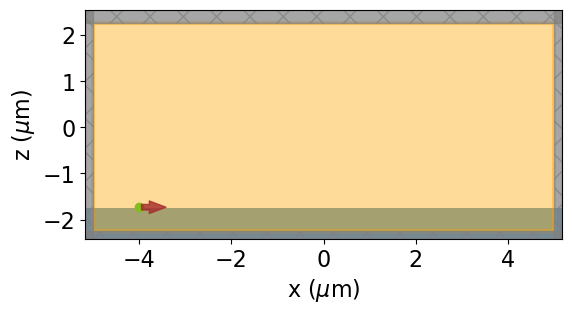

In [7]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(6, 4))
sim.plot(y=0, freq=freq0, ax=ax);
ax.set_title('')
ax.set_xlabel('x ($\mu$m)')
ax.set_ylabel('z ($\mu$m)')
plt.show()

In [8]:
sim_data = web.run(sim, task_name='lecture05_gold_SPP', path=f'data/data_gold_spp.hdf5')

[12:01:02] Created task 'lecture05_gold_SPP' with task_id                                             ]8;id=124177;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=314301;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#189\189]8;;\
           'fdve-776dca11-c8f7-49ff-8ae7-659e243b0b5bv1'.                                                          

           View task using web UI at                                                                  ]8;id=385931;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=113907;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#191\191]8;;\
           ]8;id=45423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-776dca11-c8f7-49ff-8ae7-659e243b0b5bv1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=245102;https://tidy3d.simulation.cloud/workbench?taskId=fdve-776dca11-c8f7-49ff-8ae7-659e243b0b5bv1\taskId]8;;\]8;id=45423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-776dca11-c8f7-49ff-8ae7-659e243b0b5bv1\=]8;;\]8;id=999153;https://tidy3d.simulation.cloud/workbench?taskId=fdve-776dca11-c8f7-49ff-8ae7-659e243b0b5bv1\fdve]8;;\]8;id=45423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-776dca11-c8f7-49ff-8ae7-659e243b0b5bv1\-776dca11-c8f7-49ff-8ae7-659e243b0b5]8;;\              
           ]8;id=45423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-776dca11-c8f7-49ff-8ae7-659e243b0b5bv1\bv1']8;;\.                                                                                                   

Output()

[12:01:05] status = queued                                                                            ]8;id=28165;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=660150;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#363\363]8;;\

Output()

[12:01:08] status = preprocess                                                                        ]8;id=610055;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=468176;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#357\357]8;;\

[12:01:13] Maximum FlexCredit cost: 0.063. Use 'web.real_cost(task_id)' to get the billed FlexCredit  ]8;id=402896;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=196476;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#343\343]8;;\
           cost after a simulation run.                                                                            

           starting up solver                                                                         ]8;id=454181;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=573969;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#379\379]8;;\

           running solver                                                                             ]8;id=522374;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=179552;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#389\389]8;;\

           To cancel the simulation, use 'web.delete(task_id)' or delete the task in the web UI.      ]8;id=158490;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=86711;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#390\390]8;;\
           Terminating the Python script will not stop the job running on the cloud.                               

Output()

[12:01:28] early shutoff detected, exiting.                                                           ]8;id=319812;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=671823;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#407\407]8;;\

           status = postprocess                                                                       ]8;id=585988;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=772150;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#424\424]8;;\

Output()

[12:01:33] status = success                                                                           ]8;id=99605;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=555388;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#431\431]8;;\

Output()

[12:01:38] loading SimulationData from data/data_gold_spp.hdf5                                        ]8;id=208657;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=598103;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#609\609]8;;\

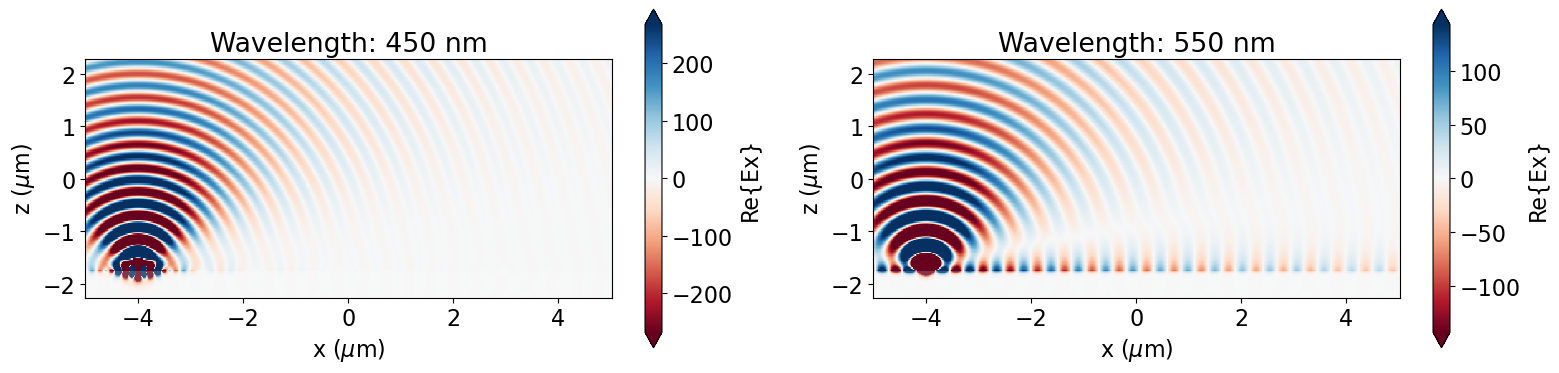

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4), tight_layout=True)

sim_data.plot_field('field', 'Ex', y=0, f=C_0/0.45, val='real', ax = ax[0], vmax = None)
ax[0].set_title('Wavelength: 450 nm')
ax[0].set_xlabel('x ($\mu$m)')
ax[0].set_ylabel('z ($\mu$m)')

sim_data.plot_field('field', 'Ex', y=0, f=C_0/0.55, val='real', ax = ax[1], vmax = None)
ax[1].set_title('Wavelength: 550 nm')
ax[1].set_xlabel('x ($\mu$m)')
ax[1].set_ylabel('z ($\mu$m)')
plt.show()